In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\All\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')
y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 15)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), strides=1, kernel_regularizer=l1(0.01)))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1))

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             1024      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4325 (16.89 KB)
Trainable params: 4325 (16.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 3s 2ms/step - loss: 111683.5156 - mse: 111670.4141 - rmse: 326.1115 - mae: 212.8449 - mape: 2849424128.0000 - val_loss: 93075.8203 - val_mse: 93059.2422 - val_rmse: 297.8146 - val_mae: 190.7879 - val_mape: 1972865792.0000
Epoch 2/100
1083/1083 [==============================] - 2s 2ms/step - loss: 88844.0156 - mse: 88825.0391 - rmse: 291.8568 - mae: 183.3291 - mape: 2336897536.0000 - val_loss: 81977.3828 - val_mse: 81956.1406 - val_rmse: 278.9634 - val_mae: 176.6389 - val_mape: 1732253184.0000
Epoch 3/100
1083/1083 [==============================] - 2s 2ms/step - loss: 79010.4062 - mse: 78987.7344 - rmse: 274.6169 - mae: 171.2068 - mape: 2144653440.0000 - val_loss: 78357.9141 - val_mse: 78333.8047 - val_rmse: 271.0595 - val_mae: 165.6485 - val_mape: 1800842752.0000
Epoch 4/100
1083/1083 [==============================] - 2s 2ms/step - loss: 73612.6953 - mse: 73587.3828 - rmse: 264.0646 - mae: 164.2895 - mape: 2093338240.0000 - va

1083/1083 [==============================] - 2s 1ms/step - loss: 41233.9648 - mse: 41185.2344 - rmse: 195.8112 - mae: 121.8267 - mape: 1957618176.0000 - val_loss: 39580.3008 - val_mse: 39531.3516 - val_rmse: 191.3311 - val_mae: 119.6925 - val_mape: 1757198976.0000
Epoch 31/100
1083/1083 [==============================] - 2s 1ms/step - loss: 40546.7695 - mse: 40497.6406 - rmse: 194.3369 - mae: 120.4335 - mape: 1906483200.0000 - val_loss: 39930.5508 - val_mse: 39881.0781 - val_rmse: 192.7354 - val_mae: 119.9763 - val_mape: 1651180544.0000
Epoch 32/100
1083/1083 [==============================] - 2s 1ms/step - loss: 39990.7891 - mse: 39941.1758 - rmse: 192.7851 - mae: 120.0984 - mape: 1913819904.0000 - val_loss: 39419.1641 - val_mse: 39369.2695 - val_rmse: 190.9113 - val_mae: 119.1717 - val_mape: 1841106688.0000
Epoch 33/100
1083/1083 [==============================] - 2s 1ms/step - loss: 39772.9648 - mse: 39722.9336 - rmse: 192.0741 - mae: 119.6987 - mape: 1902359168.0000 - val_loss: 415

1083/1083 [==============================] - 2s 1ms/step - loss: 32988.6484 - mse: 32929.2891 - rmse: 174.6892 - mae: 108.3365 - mape: 1784363776.0000 - val_loss: 32181.9355 - val_mse: 32122.3965 - val_rmse: 172.8416 - val_mae: 107.6684 - val_mape: 1907290240.0000
Epoch 60/100
1083/1083 [==============================] - 2s 2ms/step - loss: 32795.2734 - mse: 32735.5840 - rmse: 174.2324 - mae: 108.2959 - mape: 1702888576.0000 - val_loss: 34753.7188 - val_mse: 34693.8789 - val_rmse: 179.2567 - val_mae: 111.3356 - val_mape: 1784967936.0000
Epoch 61/100
1083/1083 [==============================] - 2s 2ms/step - loss: 32687.0840 - mse: 32627.0195 - rmse: 173.6917 - mae: 108.0331 - mape: 1759526784.0000 - val_loss: 32141.4980 - val_mse: 32081.3145 - val_rmse: 172.4314 - val_mae: 107.0975 - val_mape: 1742054656.0000
Epoch 62/100
1083/1083 [==============================] - 2s 2ms/step - loss: 32435.6406 - mse: 32375.2969 - rmse: 173.3606 - mae: 108.1425 - mape: 1769271936.0000 - val_loss: 335

In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 33657.5742 - mse: 33597.3867 - rmse: 176.1937 - mae: 108.3716 - mape: 1743278336.0000
Test Loss: [33657.57421875, 33597.38671875, 176.19366455078125, 108.37159729003906, 1743278336.0]


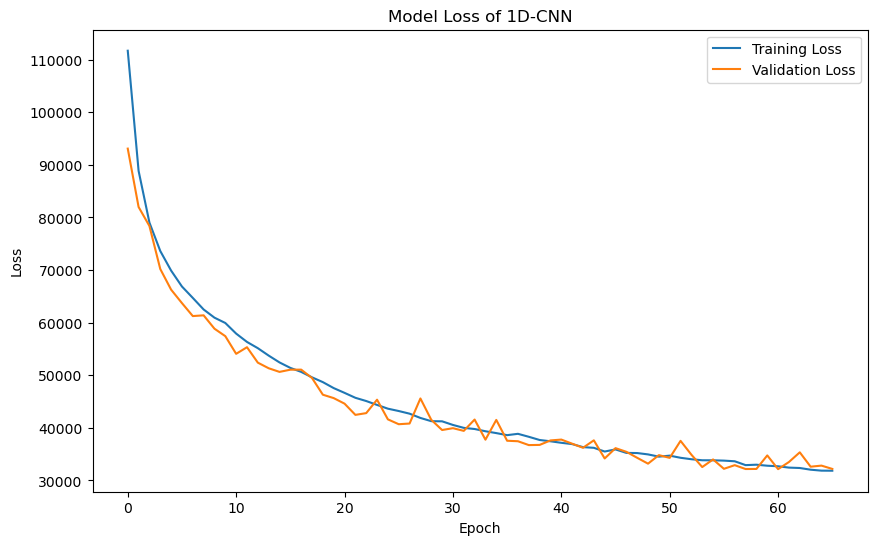

In [13]:
# History is the output of the model.fit() method
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of 1D-CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 948us/step


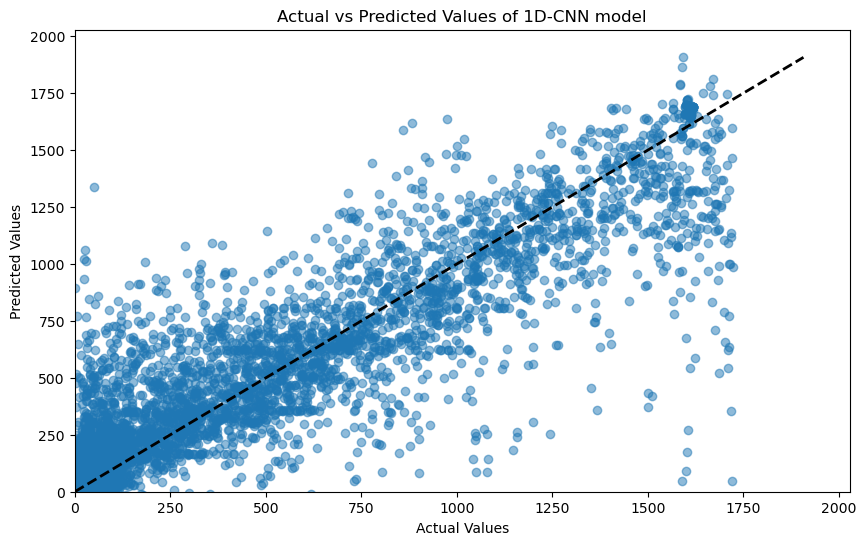

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of 1D-CNN model')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

# Set the limits for x and y axis to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

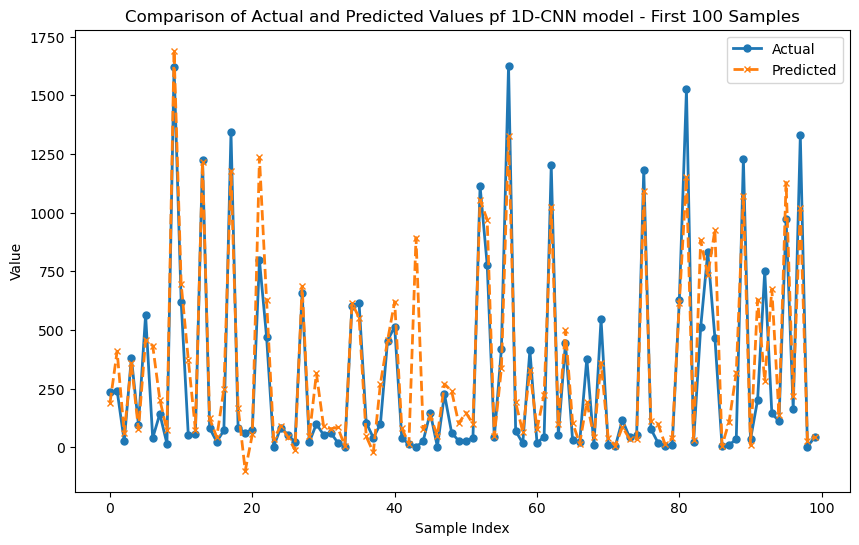

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values pf 1D-CNN model - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

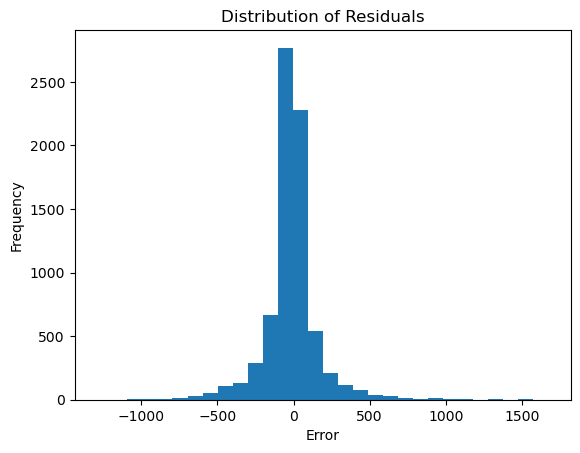

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 33657.5742 - mse: 33597.3867 - rmse: 176.1937 - mae: 108.3716 - mape: 1743278336.0000
Test loss (MSE): 33657.57421875
Mean Squared Error (MSE): 33597.38671875
Root Mean Squared Error (RMSE): 176.19366455078125
Mean Absolute Error (MAE): 108.37159729003906
Mean Absolute Percentage Error (MAPE): 1743278336.0


### Hyperparameter Tuning 

In [19]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [20]:
sequence_length = 100 
num_features = 10 
input_shape = (sequence_length, num_features)

In [21]:
def build_model_cnn(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=512, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu',
        input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
        activation='relu'))
    model.add(Dense(1, activation='linear'))  # Adjust the activation function as per your problem's need

    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',  # Adjust the loss function as per your problem's need
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [22]:
# Set up the tuner for the CNN model
tuner_cnn = kt.RandomSearch(
    build_model_cnn,
    objective='val_mse',  
    max_trials=10,        
    executions_per_trial=3, 
    directory='my_dir_cnn',    
    project_name='1d_cnn'
)

Reloading Tuner from my_dir_cnn\1d_cnn\tuner0.json


In [23]:
tuner_cnn.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |64                |filters
7                 |7                 |kernel_size
512               |192               |dense_units
0.00036919        |0.0049697         |learning_rate

Epoch 1/10


Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anacon

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\firoj\AppData\Local\Temp\__autograph_generated_filenk389rer.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 100, 10), found shape=(None, 1, 15)



In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Filters: {best_hps.get('filters')}")
print(f"Best Kernel Size: {best_hps.get('kernel_size')}")
print(f"Best Dense Units: {best_hps.get('dense_units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")